In [1]:
import numpy as np
import lsst.sims.featureScheduler as fs
from lsst.sims.speedObservatory import Speed_observatory
import healpy as hp
%matplotlib inline

In [2]:
survey_length = 8  # days
# Define what we want the final visit ratio map to look like
survey_filters = ['u','g','r','i','z','y']
surveys = []

for f in survey_filters:
    bfs = []
    bfs.append(fs.Slewtime_basis_function_cost(filtername=f))
    bfs.append(fs.Visit_repeat_basis_function_cost(filtername=f,survey_filters=survey_filters))
    bfs.append(fs.Target_map_basis_function_cost(filtername=f, survey_filters=survey_filters))
    bfs.append(fs.Normalized_alt_basis_function_cost(filtername=f))
    bfs.append(fs.Hour_angle_basis_function_cost())
    bfs.append(fs.Depth_percentile_basis_function_cost())
    weights = np.array([5.,          6.33114482,  1.08162961,  2.94730205,  7.85046524,  8.11934505])
    surveys.append(fs.Simple_greedy_survey_fields_cost(bfs, weights, filtername=f, block_size= 10))

scheduler = fs.Core_scheduler_cost(surveys)
observatory = Speed_observatory()
observatory, scheduler, observations = fs.sim_runner(observatory, scheduler,
                                                     survey_length=survey_length,
                                                     filename='Elahe.db', delete_past=True)

/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/features.py:406: RuntimeWarning: invalid value encountered in arccos
  self.ha_limit = np.arccos(cosha)*12/np.pi
/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/features.py:360: RuntimeWarning: invalid value encountered in arccos
  self.lmst_max = np.arccos(cos_ha) + self.ra
/Users/yoachim/gitRepos/sims_ocs/python/lsst/sims/ocs/environment/seeing_model.py:61: RuntimeWarning: invalid value encountered in power
  airmass_correction = numpy.power(airmass, self.AIRMASS_CORRECTION_POWER)
/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/features.py:450: RuntimeWarning: invalid value encountered in greater
  self.feature[np.where(self.feature > time_to_twilight)] = time_to_twilight
/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/features.py:453: RuntimeWarning: invalid value encountered in less
  good = np.where(current_

progress = 100.1%Completed 5031 observations


/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/basis_functions_cost.py:119: RuntimeWarning: invalid value encountered in greater_equal
  cat1 = np.where(WFD_cat & (self.since_t_last_all_filters <= smooth_gap_min) & (self.t_to_invis >= smooth_gap_max))
/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/basis_functions_cost.py:120: RuntimeWarning: invalid value encountered in less_equal
  cat2 = np.where(WFD_cat & (self.since_t_last_all_filters <= smooth_gap_min) & (self.t_to_invis <= smooth_gap_max))
/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/basis_functions_cost.py:134: RuntimeWarning: invalid value encountered in less_equal
  bad2 = np.where(WFD_cat & (self.t_to_invis <= min_t_observable))
/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/basis_functions_cost.py:141: RuntimeWarning: invalid value encountered in greater_equal
  cat1 = np.where(NES_cat & (self

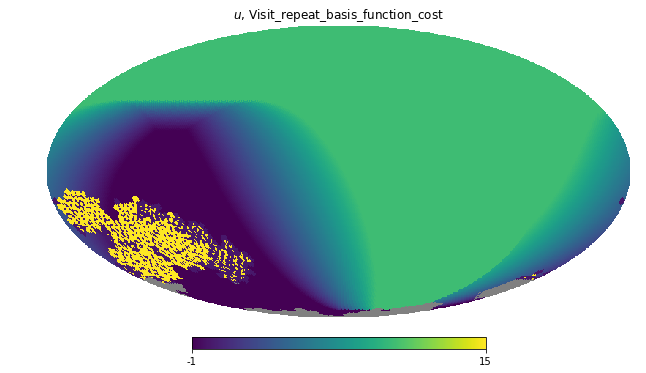

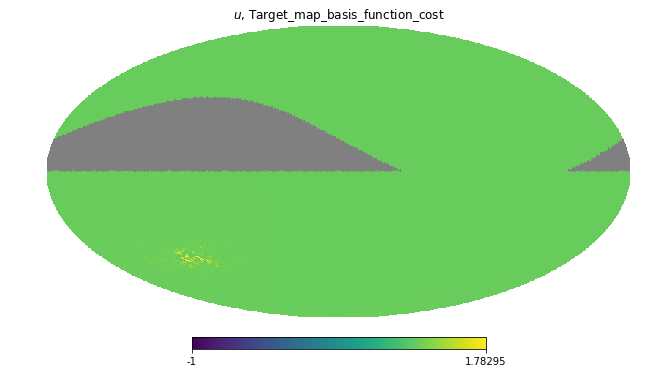

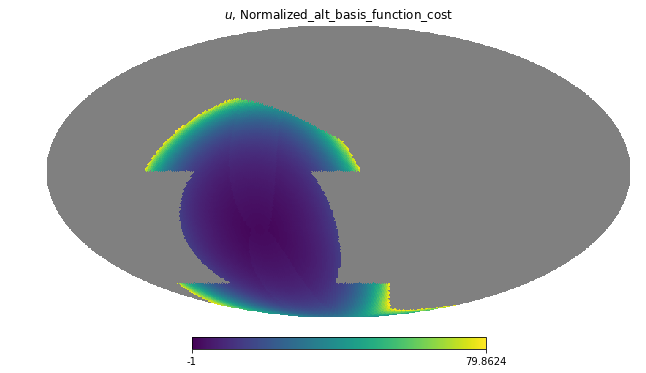

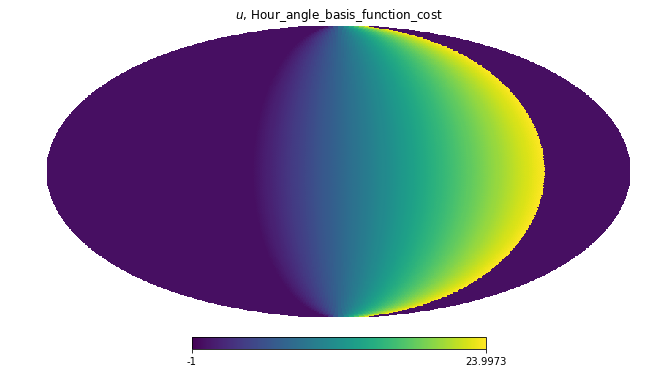

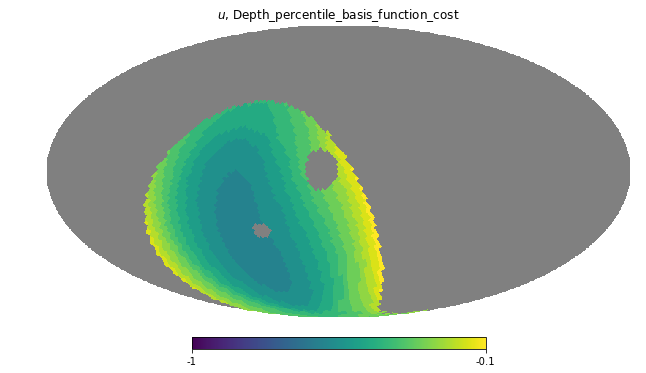

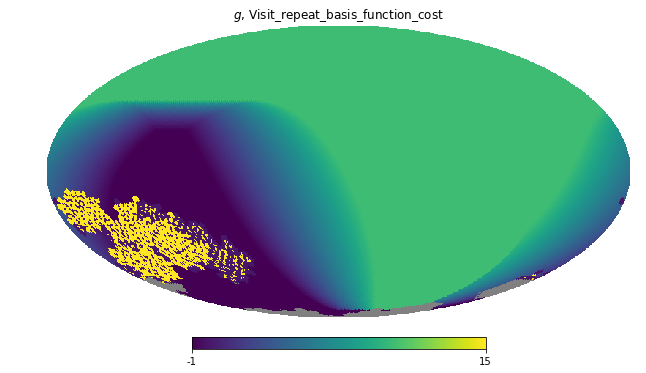

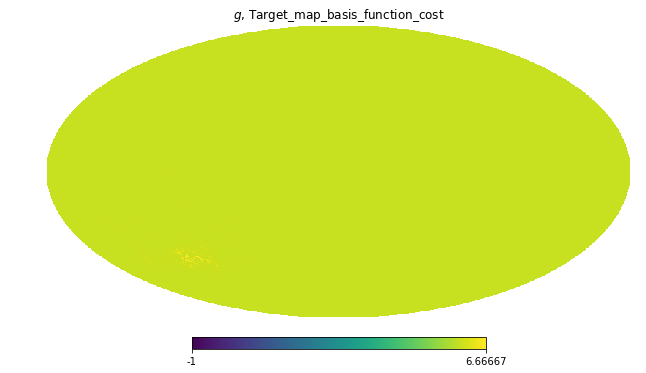

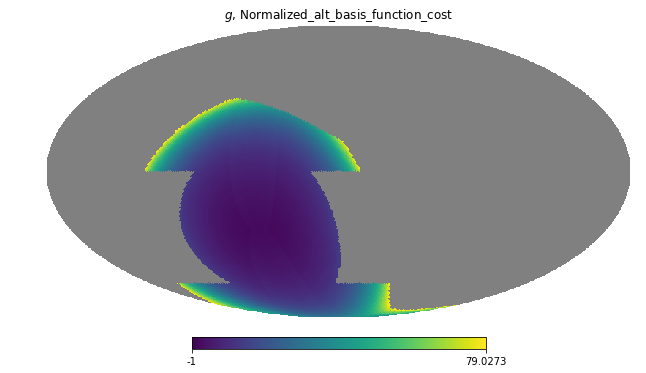

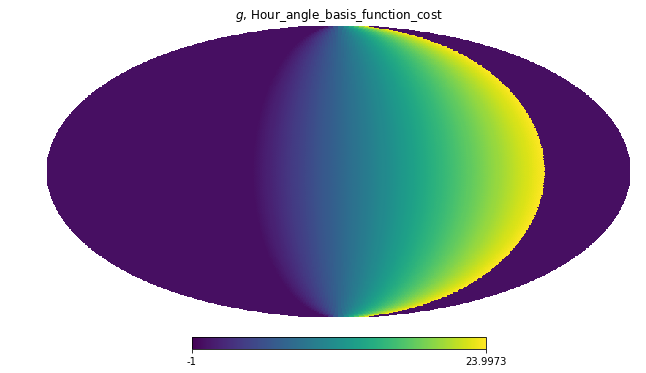

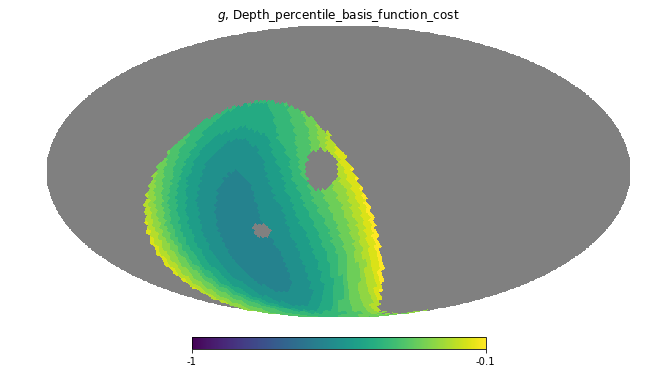

In [3]:
for fn, survey in zip(['u', 'g'], scheduler.surveys):
    for basis_function in survey.basis_functions:
        reward = basis_function()
        if np.size(reward) > 1:
            hp.mollview(reward, min=-1, title='$%s$, %s' % (fn, type(basis_function).__name__.split('.')[-1]))

In [4]:
t_decimals = np.modf(observations['mjd'])[0]
t_dec_shifted = np.roll(t_decimals, -1)
deltas = t_dec_shifted - t_decimals
interval = np.sum(deltas[deltas>0]) *24.*60.*60.
# avg of slew times
avg_slew = np.sum(observations['slewtime'])/interval
# avg number of observations
N_obs = len(observations['RA'])/(interval/60.)

print(interval,avg_slew, N_obs)

219563.039438 0.313755173214 1.37482155819
